LGBM & XGBM
Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.



In [71]:
#pip install --upgrade dask joblib
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [72]:
#pip install --upgrade lightgbm
#pip install --upgrade lightgbm
#pip install scikit-learn==0.24.2

In [73]:
#pip install --upgrade dask joblib --user

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from  sklearn.ensemble import
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

In [75]:
#Exploratory Data Analysis (EDA):
# 1Load the Titanic dataset using Python's pandas library.
df_test=pd.read_csv("Titanic_test.csv")
df_train=pd.read_csv("Titanic_train.csv")

In [76]:
df_test.head(25)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [77]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [78]:
#2.	Check for missing values.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


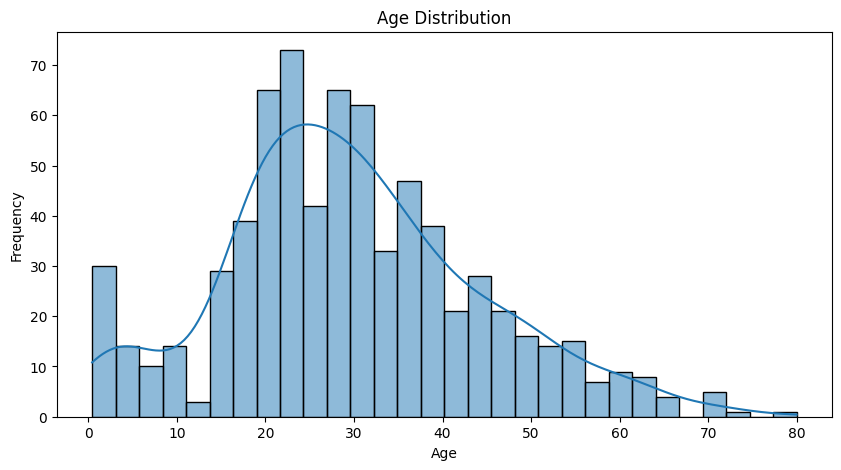

In [79]:
#3.	Explore data distributions using histograms and box plots.
# Visualize distributions of Age
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

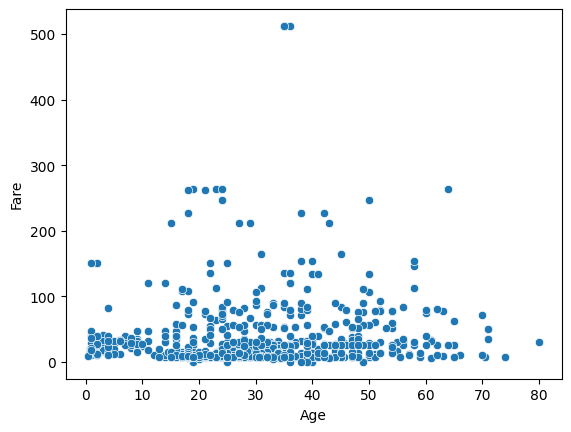

In [80]:
#4.	Visualize relationships between features and survival using scatter plots and bar plots.
sns.scatterplot(x='Age', y='Fare', data=df_train)

# Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.

<Axes: >

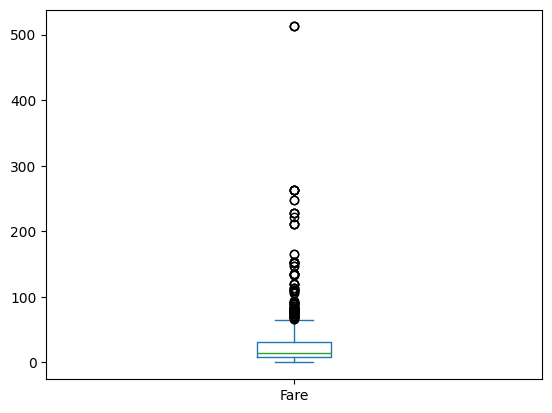

In [81]:
df_train["Fare"].plot(kind="box")

<Axes: >

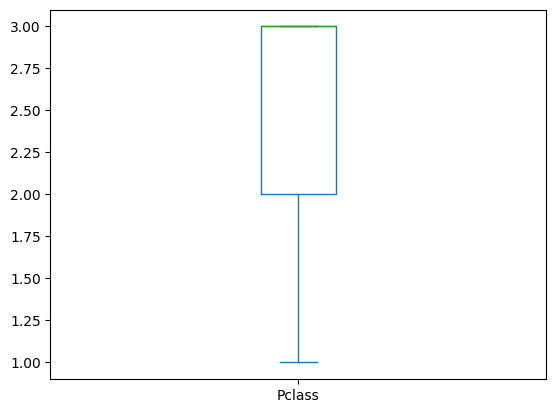

In [82]:
df_train["Pclass"].plot(kind="box")

<Axes: >

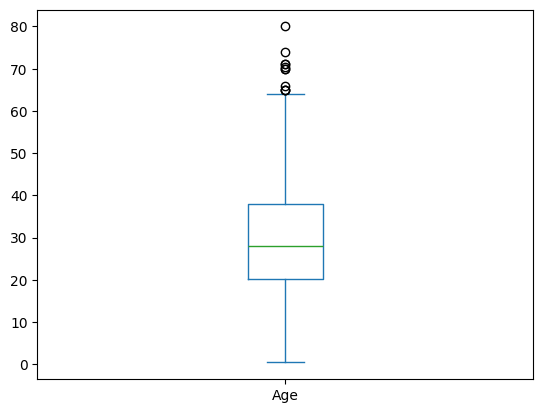

In [83]:
df_train["Age"].plot(kind="box")

<Axes: >

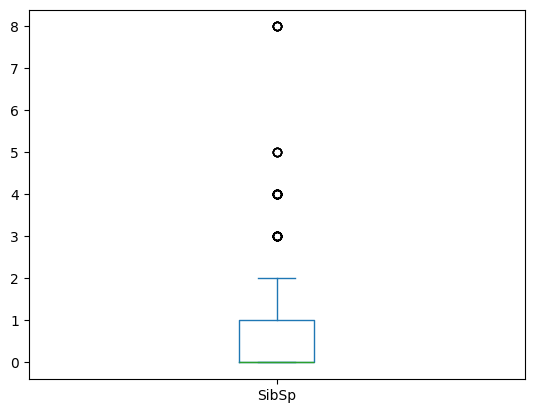

In [84]:
df_train["SibSp"].plot(kind="box")

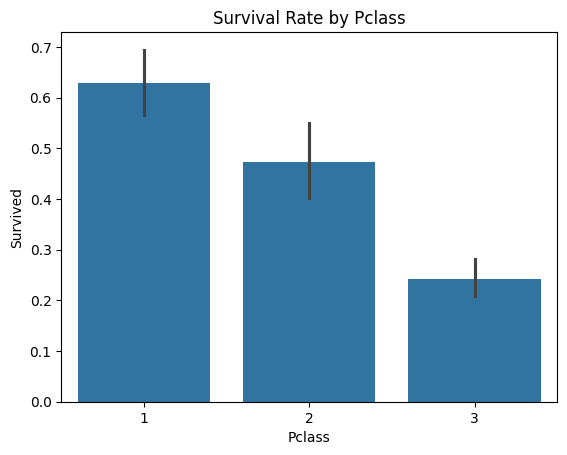

In [85]:
# Visualize the relationship between Pclass and Survival
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Survival Rate by Pclass')
plt.show()


<Axes: xlabel='Sex', ylabel='Survived'>

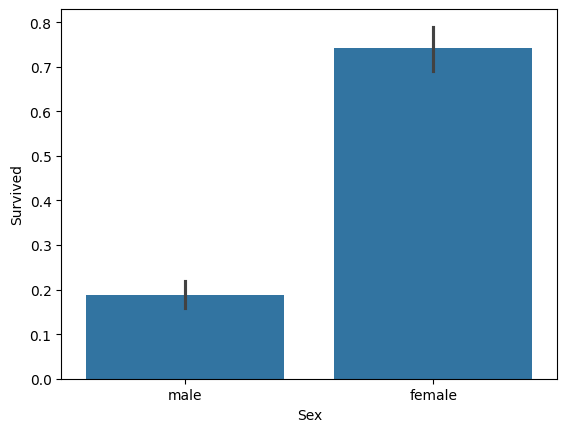

In [86]:
#4.	Visualize relationships between features and survival using scatter plots and bar plots.



sns.barplot(x='Sex', y='Survived', data=df_train)


<Axes: xlabel='Embarked', ylabel='Survived'>

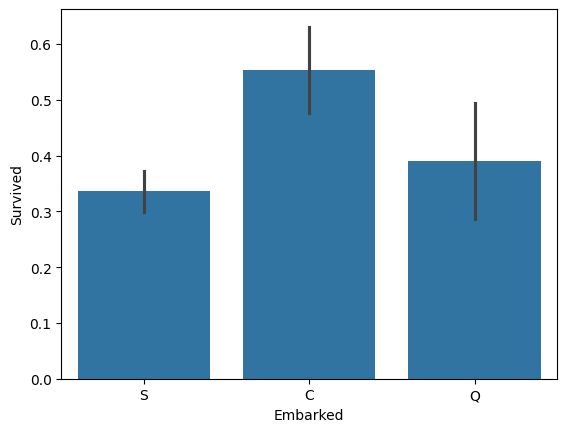

In [87]:
sns.barplot(x='Embarked', y='Survived', data=df_train)


In [88]:
#Data Preprocessing:
#1.	Impute missing values.
#2.	Encode categorical variables using one-hot encoding or label encoding.
#3.	If needed you can apply more preprocessing methods on the given dataset.

In [89]:
#1.	Impute missing values.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1.	Impute missing values.

In [90]:

#77.1 percentage of data in the cabin column is missing so  it  is not good decision to add it in the
# our model and imputation also don't work effectively
df_train['Cabin'].isnull().sum()/df_train.shape[0]*100

77.10437710437711

In [91]:
#77.1 percentage of data in the cabin column is missing so  it  is not good decision to add it in the
# our model and imputation also don't work effectively
df_train['Cabin'].isnull().sum()/df_train.shape[0]*100
df_train_cleaned=df_train.drop(columns=['Cabin'])
df_test_cleaned=df_test.drop(columns=['Cabin'])

In [92]:
#19.86 percentage of data is missing in the age column
print(df_train["Age"].isnull().sum()/df_train.shape[0]*100)
print("mean of the age column", df_train["Age"].mean())
print("median of the age column", df_train["Age"].median())
print("mode of the age column", df_train["Age"].mode())

19.865319865319865
mean of the age column 29.69911764705882
median of the age column 28.0
mode of the age column 0    24.0
Name: Age, dtype: float64


In [93]:
mean_value = df_train['Age'].mean()
print(mean_value)
df_train_cleaned['Age'] = df_train['Age'].fillna(value=mean_value)
df_test_cleaned['Age'] = df_test['Age'].fillna(value=mean_value)

29.69911764705882


In [94]:
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [95]:
df_train_cleaned['Embarked'].isnull().sum()/df_train_cleaned['Embarked'].shape[0]*100

0.22446689113355783

In [96]:
s1=df_train_cleaned['Embarked'].value_counts()
df_train_cleaned['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Embarked', ylabel='count'>

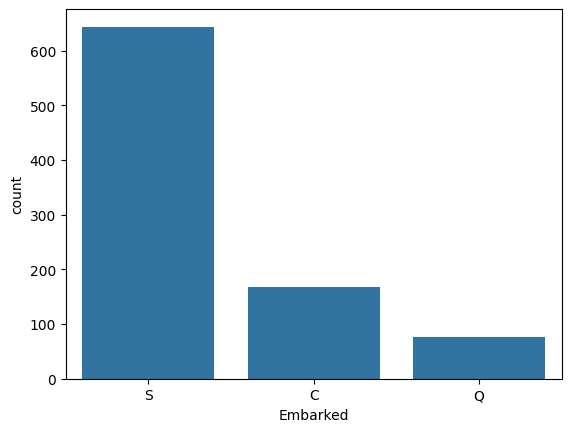

In [97]:
sns.countplot(x='Embarked', data=df_train_cleaned)

In [98]:
#  Here in Embarked column    s class is  used 644 time so we go with this  class
mean_value = "S"
df_train_cleaned['Embarked'] = df_train['Embarked'].fillna(value=mean_value)


In [99]:
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [100]:
df_test_cleaned_final=df_test_cleaned.dropna()

In [101]:
df_test_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [102]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

# Drop only the columns that are present in the DataFrame
df_train_cleaned.drop(columns=[col for col in columns_to_drop if col in df_train_cleaned.columns], inplace=True)
df_test_cleaned.drop(columns=[col for col in columns_to_drop if col in df_test_cleaned.columns], inplace=True)


# 2.	Encode categorical variables using one-hot encoding or label encoding.


In [103]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Color' column
df_train_cleaned['Sex'] = label_encoder.fit_transform(df_train_cleaned['Sex'])
# Apply label encoding to the 'Size' column
df_train_cleaned['Embarked'] = label_encoder.fit_transform(df_train_cleaned['Embarked'])


# Apply label encoding to the 'Color' column
df_test_cleaned['Sex'] = label_encoder.fit_transform(df_test_cleaned['Sex'])
# Apply label encoding to the 'Size' column
df_test_cleaned['Embarked'] = label_encoder.fit_transform(df_test_cleaned['Embarked'])

In [104]:
df_train_cleaned

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,2
1,1,1,0,38.000000,71.2833,0
2,1,3,0,26.000000,7.9250,2
3,1,1,0,35.000000,53.1000,2
4,0,3,1,35.000000,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,2
887,1,1,0,19.000000,30.0000,2
888,0,3,0,29.699118,23.4500,2
889,1,1,1,26.000000,30.0000,0


# 3.	If needed you can apply more preprocessing methods on the given dataset.

In [105]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the 'Age' and 'Fare' columns
df_train_cleaned[['Age', 'Fare']] = scaler.fit_transform(df_train_cleaned[['Age', 'Fare']])



df_test_cleaned[['Age', 'Fare']] = scaler.transform(df_test_cleaned[['Age', 'Fare']])

# Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [106]:
#1.	Split the preprocessed dataset into training and testing sets.
y=df_train_cleaned.iloc[:,:1]
x=df_train_cleaned.iloc[:,1:]


In [107]:
#pip install --upgrade lightgbm xgboost
#import lightgbm # >=4

In [108]:
#2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
#3.	Build predictive models using LightGBM and XGBoost algorithms.

# Import necessary libraries
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(x_train, y_train)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

# Predictions on the test set
lgbm_preds = lgbm_model.predict(x_test)
xgb_preds = xgb_model.predict(x_test)

# Ensure y_test and predictions are of the same length
assert len(y_test) == len(lgbm_preds), f"Inconsistent lengths: y_test({len(y_test)}) vs lgbm_preds({len(lgbm_preds)})"
assert len(y_test) == len(xgb_preds), f"Inconsistent lengths: y_test({len(y_test)}) vs xgb_preds({len(xgb_preds)})"



[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [109]:
#4.	Train the models on the training set and evaluate their performance on the testing set.
# Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

print("LightGBM Precision:", precision_score(y_test, lgbm_preds, average='weighted'))
print("XGBoost Precision:", precision_score(y_test, xgb_preds, average='weighted'))

print("LightGBM Recall:", recall_score(y_test, lgbm_preds, average='weighted'))
print("XGBoost Recall:", recall_score(y_test, xgb_preds, average='weighted'))

print("LightGBM F1 Score:", f1_score(y_test, lgbm_preds, average='weighted'))
print("XGBoost F1 Score:", f1_score(y_test, xgb_preds, average='weighted'))


LightGBM Accuracy: 0.8100558659217877
XGBoost Accuracy: 0.7877094972067039
LightGBM Precision: 0.8109665061389711
XGBoost Precision: 0.7877094972067039
LightGBM Recall: 0.8100558659217877
XGBoost Recall: 0.7877094972067039
LightGBM F1 Score: 0.8104089671966768
XGBoost F1 Score: 0.7877094972067039


In [110]:
lgbm_model = lgb.LGBMClassifier(
    min_data_in_leaf=30,
    min_gain_to_split=0.1,
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1
)
lgbm_model.fit(x_train, y_train)

lgbm_preds = lgbm_model.predict(x_test)
# Best parameters and score



[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] N

In [117]:
#4.	Train the models on the training set and evaluate their performance on the testing set.
# Evaluation
accuracy_lgbm=accuracy_score(y_test, lgbm_preds)
accuracy_xgbm=accuracy_score(y_test, xgb_preds)

precision_lgbm=accuracy_score(y_test, lgbm_preds)
precision_xgbm=accuracy_score(y_test, xgb_preds)

recall_lgbm=accuracy_score(y_test, lgbm_preds)
recall_xgbm=accuracy_score(y_test, xgb_preds)

f1_score_lgbm=accuracy_score(y_test, lgbm_preds)
f1_score_xgbm=accuracy_score(y_test, xgb_preds)

print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

print("LightGBM Precision:", precision_score(y_test, lgbm_preds, average='weighted'))
print("XGBoost Precision:", precision_score(y_test, xgb_preds, average='weighted'))

print("LightGBM Recall:", recall_score(y_test, lgbm_preds, average='weighted'))
print("XGBoost Recall:", recall_score(y_test, xgb_preds, average='weighted'))

print("LightGBM F1 Score:", f1_score(y_test, lgbm_preds, average='weighted'))
print("XGBoost F1 Score:", f1_score(y_test, xgb_preds, average='weighted'))

LightGBM Accuracy: 0.8324022346368715
XGBoost Accuracy: 0.7877094972067039
LightGBM Precision: 0.8319226225897274
XGBoost Precision: 0.7877094972067039
LightGBM Recall: 0.8324022346368715
XGBoost Recall: 0.7877094972067039
LightGBM F1 Score: 0.8311891835182417
XGBoost F1 Score: 0.7877094972067039


In [112]:
#Hyperparameter Tuning

In [113]:
 # Tuning parameters for LightBM
from sklearn.model_selection import GridSearchCV
lgb_params_grid= {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
lgbm_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_params_grid, cv=5, scoring='accuracy')
lgbm_grid.fit(x_train, y_train)
print(f"Best parameters for LightGBM: {lgbm_grid.best_params_}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [114]:

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
print(f"Best parameters for XGBoost: {xgb_grid.best_params_}")

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [115]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_score_xgbm]
xgb_scores = [accuracy_xgbm, precision_xgbm, recall_xgbm, f1_score_xgbm]

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1 Score')]

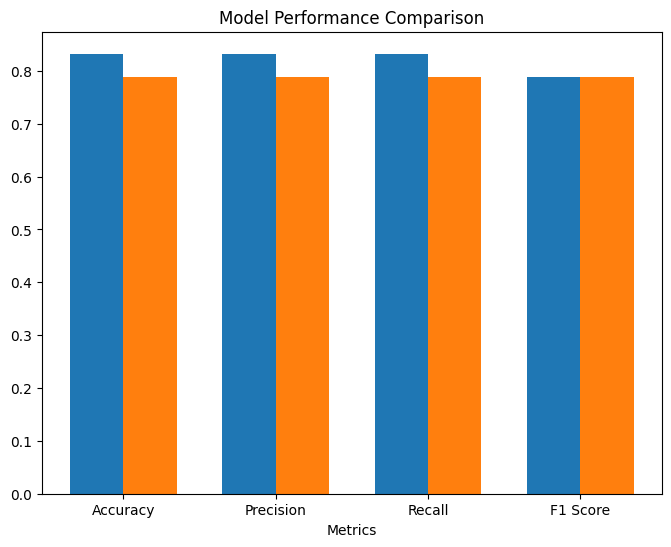

In [116]:
# Bar plot for comparison
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, lgb_scores, width, label='LightGBM')
ax.bar(x + width/2, xgb_scores, width, label='XGBoost')

ax.set_xlabel('Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)


